In [1]:
import matplotlib.pyplot as plt
import random
from scipy.special import hermite, genlaguerre
import math
import numpy as np

xx = np.linspace(-9, +9, 7, )
yy = np.linspace(-6, +6, 5, )
X, Y = np.meshgrid(xx, np.flip(yy))

In [2]:
lambd = 0.532  # wavelength for which the optical element is designed
k0 = 2 * math.pi / lambd
w0 = 500
z0 = math.pi / lambd * w0 ** 2
k = 0
n = 9
m = 2
a = 1

sko = math.pi / 2
rho = 19.39


zz = np.array([z0/200, z0/50, z0/20, z0/10, z0/2,   z0, 2 * z0])

RR = np.array([  2000,  2000,  2000,  2000, 2000, 2000,  2000]).astype(float)
NN = np.array([  4096,  2048,  4096,  2048, 2048, 2048,  2048])
NC = np.array([  2048,  1024,  2048,  1024, 1024, 1024,  1024]) # Sizes of cropped images
zz = np.array([z0])
RR = np.array([10000]).astype(float)
NN = np.array([2048])
NC = np.array([1024])

In [3]:


def SquareMesh(R, N, dtype=None):
    xx = np.linspace(-R, +R, N, dtype)
    dx = 2 * R / (N - 1)
    X, Y = np.meshgrid(xx, np.flip(xx))
    return X, Y, dx

def EncodeField(E, scale):
    S = np.shape(E)
    N1 = S[0]
    N2 = S[1]
    E = E / np.max(np.abs(E))
    E_abs = np.abs(E)
    E_ang = myarg(E)
    U = E_ang + np.arccos(E_abs)
    V = E_ang - np.arccos(E_abs)
    E2 = np.zeros((scale * N1, scale * N2))
    scale2 = int(scale / 2)
    for ix in range(N1):
        for iy in range(N2):
            E2[(ix * scale) : (ix * scale + scale2), (iy * scale)          : iy * scale + scale2] = U[ix][iy]
            E2[(ix * scale) : (ix * scale + scale2), (iy * scale + scale2) : iy * scale + scale] = V[ix][iy]
            E2[(ix * scale + scale2) : (ix * scale + scale), (iy * scale) : iy * scale + scale2] = V[ix][iy]
            E2[(ix * scale + scale2) : (ix * scale + scale), (iy * scale + scale2) : (iy * scale + scale)] = U[ix][iy]
    E2 = np.mod(E2 + 4 * math.pi, 2 * math.pi)
    return E2

def myarg(z):
    return np.mod(np.angle(z) + 2 * math.pi, 2 * math.pi)

def CenteredFft(E1):
    E2 = np.fft.fftshift(E1)
    E2 = np.fft.fft2(E2)
    E2 = np.fft.fftshift(E2)
    return E2

for iz in range(len(zz)):
    z, R, N, Nc = zz[iz], RR[iz], NN[iz], NC[iz]

    X, Y, dx = SquareMesh(R, N, dtype=np.complex128)
    XiY = X + 1j * Y
    Rrr, Phi = np.abs(XiY), np.mod(np.angle(XiY) + 2 * math.pi, 2 * math.pi)

    E1 = np.zeros((N, N), dtype=np.complex128)
    aEimf = a * np.exp(1j * m * Phi)
    for ip in range(k, n + 1):
        print('    Adding a vortex with the TC %02d' % (m * ip))
        E1 += aEimf ** ip
    #E1 = np.exp(1j * myarg(E1)) # Make a phase-only element
    E1 *= np.exp(- Rrr * Rrr / w0 / w0)




    if True:

        E_st = E1.copy()

        #Генерация случайного поля
        Ksi = (np.random.rand(N, N)-0.5)
        U_corr = np.exp(- (np.power(X,2)+ np.power(Y,2)) / 2 / rho ** 2)
        FftU_corr = CenteredFft(U_corr)
        FftU_corr = np.sqrt(FftU_corr)
        FftKsi = CenteredFft(Ksi)
        RandPhase = CenteredFft(FftU_corr*FftKsi)
        RandPhase = np.real(RandPhase)
        RandPhase = RandPhase * (dx ** 2)
        RandPhase = RandPhase / np.sqrt(np.max(np.power(np.abs(RandPhase),2)))
        RandPhase = sko * RandPhase
        
        E1 *= np.exp(1j * RandPhase)





        Kernel = -1j * k0 / 2.0 / math.pi / z * np.exp(1j * k0 / 2.0 / z * np.square(Rrr))

        Kernel *= (Rrr <= R)
        FftKernel = np.fft.fft2(Kernel)
        FftE1 = np.fft.fft2(E1)
        E3 = FftKernel * FftE1 
        E3 = np.fft.ifft2(E3)
        E3 = E3 * dx * dx  
        E3 = np.fft.fftshift(E3)




    Adding a vortex with the TC 00
    Adding a vortex with the TC 02
    Adding a vortex with the TC 04
    Adding a vortex with the TC 06
    Adding a vortex with the TC 08
    Adding a vortex with the TC 10
    Adding a vortex with the TC 12
    Adding a vortex with the TC 14
    Adding a vortex with the TC 16
    Adding a vortex with the TC 18


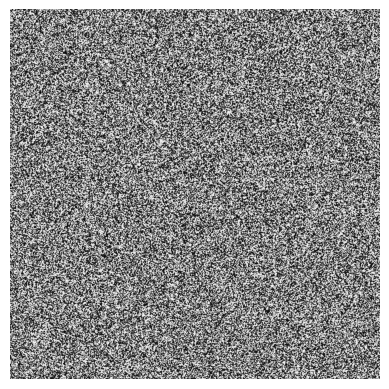

In [4]:
G = np.exp(1j * RandPhase)
Ph_screen = np.mod(np.angle(G) + 2 * math.pi, 2 * math.pi)


plt.imshow(Ph_screen, cmap='gray')
plt.axis('off')
plt.show()

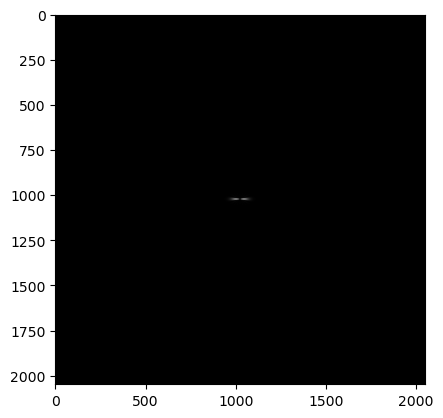

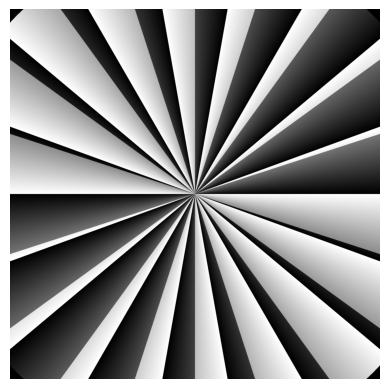

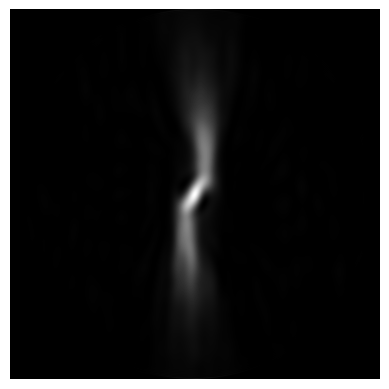

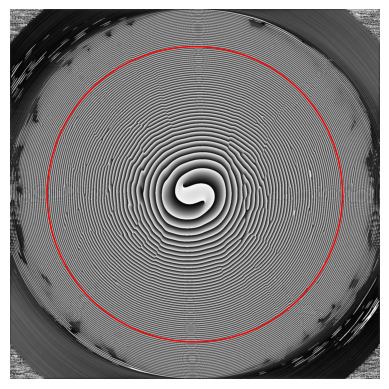

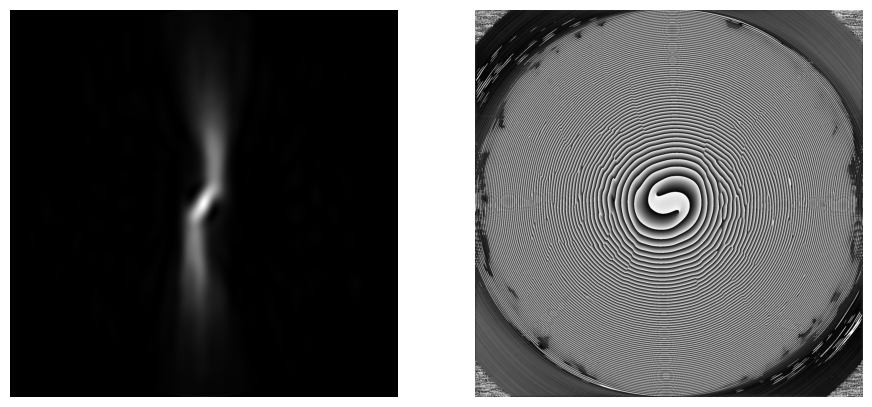

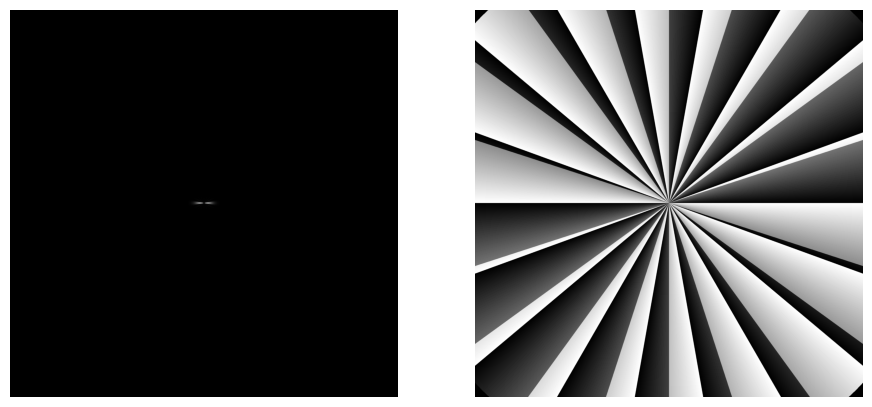

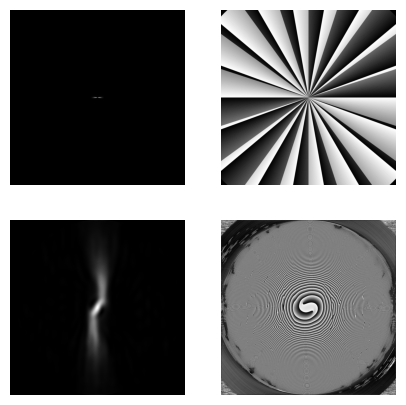

In [5]:
I = np.abs(E3)**2
I_st = np.abs(E_st)**2
Ph_st = np.mod(np.angle(E_st) + 2 * math.pi, 2 * math.pi)
Ph = np.mod(np.angle(E3) + 2 * math.pi, 2 * math.pi)


plt.imshow(I_st, cmap='gray')
#plt.axis('off')
plt.show()
plt.imshow(Ph_st, cmap='gray')
#plt.axis('off')
circle1 = plt.Circle((NN/2, NN/2), R*0.9/5, color='r', fill=False)
plt.gca().add_patch(circle1)
plt.axis('off')
plt.show()
plt.show()
plt.imshow(I, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(Ph, cmap='gray')
plt.axis('off')
circle1 = plt.Circle((NN/2, NN/2), R*0.9/11, color='r', fill=False)
plt.gca().add_patch(circle1)
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11.0,7.0))
axs[0].imshow(I,cmap='gray'); axs[0].axis('off');
axs[1].imshow(Ph,cmap='gray'); axs[1].axis('off');

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11.0,7.0))
axs[0].imshow(I_st,cmap='gray'); axs[0].axis('off');
axs[1].imshow(Ph_st,cmap='gray'); axs[1].axis('off');

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(5.0,5.0))
axs[0][0].imshow(I_st,cmap='gray'); axs[0][0].axis('off');
axs[0][1].imshow(Ph_st,cmap='gray'); axs[0][1].axis('off');
axs[1][0].imshow(I,cmap='gray'); axs[1][0].axis('off');
axs[1][1].imshow(Ph,cmap='gray'); axs[1][1].axis('off');

In [6]:
def MyTc(MeshX, MeshY, E, R1):
    dx = MeshX[0, 1] - MeshX[0, 0]
    #print('dx', dx)
    dy = MeshY[0, 0] - MeshY[1, 0]
    #print('dy', dy)
    #print(MeshY)
    Ny, Nx = np.shape(MeshX)[0], np.shape(MeshX)[1]
    #print('Ny', Ny)
    #print('Nx', Nx)
    Phs = myarg(E)
    Ep = np.exp(1j * Phs)
    [Dy, Dx] = np.gradient(Ep, dx, dy)  # Later, here 'dy' should be added!!!
    #print('Dy', Dy)
    Dy = -Dy
    Df = MeshX * Dy - MeshY * Dx
   # print('Df', Df)
    Ep = np.imag(np.conj(Ep) * Df)
    #
    TC, Ns = 0.0, 50000
    RingPhi = 2 * math.pi * np.arange(0.0, Ns, 1.0) / Ns
    Rows = np.array(np.round(Ny / 2 - R1 * np.sin(RingPhi) / dy), dtype=int)
   # print("Rows:", Rows)
    Cols = np.array(np.round(Nx / 2 + R1 * np.cos(RingPhi) / dx), dtype=int)
   # print("Cols:", Cols)
    RingTc = np.zeros(Ns)
    # RingPhs = np.zeros(Ns)
    for s in range(Ns): RingTc[s] = Ep[(Rows[s], Cols[s])] # Integrate over the ring
    TC = sum(RingTc) / Ns
    return TC


if True:
    R1 = 0.9*R

    TC1 = MyTc(X, Y, E_st, R1)

    print('    TC1 is %06.4f' % (TC1))
    TC2 = MyTc(X, Y, E3, R1)
    print('    TC2 is %06.4f' % (TC2))
    preffix_TC = "_tc1_%07.4f_tc2_%07.4f" % (TC1, TC2)
print('    Done!')

    TC1 is 8.9528
    TC2 is 8.9982
    Done!
